# Environment Preparation

In [1]:
import sys
!{sys.executable} -m pip install koalas

In [2]:
import databricks.koalas as ks
import pandas as pd
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.getOrCreate()

# Creating Spark DataFrame

In [4]:
movies_df = (spark.read
             .option("header", "true")
             .option("inferSchema", "true")
             .csv("./movies.csv")
            )
ratings_df = (spark.read
             .option("header", "true")
             .option("inferSchema", "true")
             .csv("./ratings.csv")
            )
links_df = (spark.read
             .option("header", "true")
             .option("inferSchema", "true")
             .csv("./links.csv")
            )
tags_df = (spark.read
             .option("header", "true")
             .option("inferSchema", "true")
             .csv("./tags.csv")
            )

In [5]:
movies_df.registerTempTable("movies")
ratings_df.registerTempTable("ratings")
links_df.registerTempTable("link")
tags_df.registerTempTable("tags")

In [6]:
movies_df

DataFrame[movieId: int, title: string, genres: string]

# Creating Koalas DataFrame

In [7]:
koalas_movies_df = ks.DataFrame(movies_df)
koalas_ratings_df = ks.DataFrame(ratings_df)
koalas_links_df = ks.DataFrame(links_df)
koalas_tags_df = ks.DataFrame(tags_df)

In [8]:
koalas_movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


# Top 10 rated movies in...

## ...PySpark

In [9]:
movies_with_ratings = movies_df.join(ratings_df, movies_df.movieId == ratings_df.movieId)

In [10]:
movies_with_ratings

DataFrame[movieId: int, title: string, genres: string, userId: int, movieId: int, rating: double, timestamp: int]

In [11]:
from pyspark.sql.functions import col

(movies_with_ratings
     .groupBy("title")
     .count()
     .orderBy(col("count").desc())
     .show(10, False))

+-----------------------------------------+-----+
|title                                    |count|
+-----------------------------------------+-----+
|Forrest Gump (1994)                      |329  |
|Shawshank Redemption, The (1994)         |317  |
|Pulp Fiction (1994)                      |307  |
|Silence of the Lambs, The (1991)         |279  |
|Matrix, The (1999)                       |278  |
|Star Wars: Episode IV - A New Hope (1977)|251  |
|Jurassic Park (1993)                     |238  |
|Braveheart (1995)                        |237  |
|Terminator 2: Judgment Day (1991)        |224  |
|Schindler's List (1993)                  |220  |
+-----------------------------------------+-----+
only showing top 10 rows



## ...Pandas/Koalas

In [12]:
koalas_movies_with_ratings = ks.merge(koalas_movies_df, koalas_ratings_df)

In [13]:
koalas_movies_with_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247
2,6,Heat (1995),Action|Crime|Thriller,1,4.0,964982224
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1,5.0,964983815
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0,964982931
5,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,1,3.0,964982400
6,101,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,1,5.0,964980868
7,110,Braveheart (1995),Action|Drama|War,1,4.0,964982176
8,151,Rob Roy (1995),Action|Drama|Romance|War,1,5.0,964984041
9,157,Canadian Bacon (1995),Comedy|War,1,5.0,964984100


In [14]:
(koalas_movies_with_ratings
     .groupby('title')
     .size()
     .sort_values(ascending=False)[:10])

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64

## ...Spark SQL

In [15]:
spark.sql("""
    SELECT title, COUNT(*) as CNT
    FROM movies
    LEFT JOIN ratings ON movies.movieId = ratings.movieID
    GROUP BY title
    ORDER BY CNT DESC
    LIMIT 10
""").show(10,False)

+-----------------------------------------+---+
|title                                    |CNT|
+-----------------------------------------+---+
|Forrest Gump (1994)                      |329|
|Shawshank Redemption, The (1994)         |317|
|Pulp Fiction (1994)                      |307|
|Silence of the Lambs, The (1991)         |279|
|Matrix, The (1999)                       |278|
|Star Wars: Episode IV - A New Hope (1977)|251|
|Jurassic Park (1993)                     |238|
|Braveheart (1995)                        |237|
|Terminator 2: Judgment Day (1991)        |224|
|Schindler's List (1993)                  |220|
+-----------------------------------------+---+



# Top 10 movies by average rating (more than 100 ratings)...

## ...PySpark

In [16]:
import pyspark.sql.functions as F

In [17]:
(movies_with_ratings
     .groupBy("title")
     .agg(
         F.count(F.lit(1)).alias("cnt"),
         F.avg(col("rating")).alias("avg_rating")
     )
     .filter("cnt > 100")
     .orderBy(col("avg_rating").desc())
     .select("title","avg_rating")
     .show(10, False))

+-----------------------------------------+-----------------+
|title                                    |avg_rating       |
+-----------------------------------------+-----------------+
|Shawshank Redemption, The (1994)         |4.429022082018927|
|Godfather, The (1972)                    |4.2890625        |
|Fight Club (1999)                        |4.272935779816514|
|Godfather: Part II, The (1974)           |4.25968992248062 |
|Departed, The (2006)                     |4.252336448598131|
|Goodfellas (1990)                        |4.25             |
|Dark Knight, The (2008)                  |4.238255033557047|
|Usual Suspects, The (1995)               |4.237745098039215|
|Princess Bride, The (1987)               |4.232394366197183|
|Star Wars: Episode IV - A New Hope (1977)|4.231075697211155|
+-----------------------------------------+-----------------+
only showing top 10 rows



## ...Pandas/Koalas

In [18]:
# PandasNotImplementedError: The method `pd.DataFrame.insert()` is not implemented yet.
# :-(
koalas_top_100 = (koalas_movies_with_ratings
                      .insert(0, 'cnt', 1)
                      .groupby('title')
                      .agg(
                          {
                              'rating': 'avg',
                              'cnt': 'size'
                          }
                          
                      ))

PandasNotImplementedError: The method `pd.DataFrame.insert()` is not implemented yet.

In [19]:
koalas_top_10 = (koalas_movies_with_ratings
                      .assign(cnt=1)
                      .groupby('title')
                      .agg({
                              'rating': 'avg',
                              'cnt': 'count'
                            })
                 )
over_100_cnt = koalas_top_10['cnt'] > 100
ks.set_option('compute.ops_on_diff_frames', True)
koalas_top_10 = (koalas_top_10[over_100_cnt]
                     .where(koalas_top_10.cnt>100)
                     .sort_values(by='rating', ascending=False)
                )

In [140]:
koalas_top_10[:10]

,rating,cnt
title,,
"Shawshank Redemption, The (1994)",4.429022,317.0
"Godfather, The (1972)",4.289062,192.0
Fight Club (1999),4.272936,218.0
"Godfather: Part II, The (1974)",4.259690,129.0
"Departed, The (2006)",4.252336,107.0
Goodfellas (1990),4.250000,126.0
"Dark Knight, The (2008)",4.238255,149.0
"Usual Suspects, The (1995)",4.237745,204.0
"Princess Bride, The (1987)",4.232394,142.0


In [ ]:
more_than_100 = koalas_movies_with_ratings['rating'] > 100
koalas_top_100[more_than_100].sort_values([('rating')], ascending=False)[:10]

## ...Spark SQL

In [141]:
spark.sql("""
    SELECT title, AVG(rating) as avg_rating
    FROM movies
    LEFT JOIN ratings ON movies.movieId = ratings.movieID
    GROUP BY title
    HAVING COUNT(*) > 100
    ORDER BY avg_rating DESC
    LIMIT 10
""").show(10,False)

+-----------------------------------------+-----------------+
|title                                    |avg_rating       |
+-----------------------------------------+-----------------+
|Shawshank Redemption, The (1994)         |4.429022082018927|
|Godfather, The (1972)                    |4.2890625        |
|Fight Club (1999)                        |4.272935779816514|
|Godfather: Part II, The (1974)           |4.25968992248062 |
|Departed, The (2006)                     |4.252336448598131|
|Goodfellas (1990)                        |4.25             |
|Dark Knight, The (2008)                  |4.238255033557047|
|Usual Suspects, The (1995)               |4.237745098039215|
|Princess Bride, The (1987)               |4.232394366197183|
|Star Wars: Episode IV - A New Hope (1977)|4.231075697211155|
+-----------------------------------------+-----------------+



# Top 10 Years...

## ...PySpark

In [53]:
(movies_with_ratings
     .withColumn('year', F.regexp_extract(F.col('title'),'.*\((.*)\).*', 1))
     .groupBy("year")
     .agg(
         F.avg(col("rating")).alias("avg_rating")
     )
     .orderBy(col("avg_rating").desc())
     .show(10, False))

+---------+-----------------+
|year     |avg_rating       |
+---------+-----------------+
|2006–2007|5.0              |
|1917     |4.5              |
|1930     |4.205882352941177|
|1921     |4.1              |
|1934     |4.088235294117647|
|1944     |4.043478260869565|
|1957     |4.03953488372093 |
|1954     |4.009191176470588|
|1926     |4.0              |
|1908     |4.0              |
+---------+-----------------+
only showing top 10 rows



Does withColumn after join is serious mistake?

In [51]:
(movies_with_ratings
     .withColumn('year', F.regexp_extract(F.col('title'),'.*\((.*)\).*', 1))
     .groupBy("year")
     .agg(
         F.avg(col("rating")).alias("avg_rating")
     )
     .orderBy(col("avg_rating").desc())
     .explain())

== Physical Plan ==
*(4) Sort [avg_rating#942 DESC NULLS LAST], true, 0
+- Exchange rangepartitioning(avg_rating#942 DESC NULLS LAST, 200)
   +- *(3) HashAggregate(keys=[year#924], functions=[avg(rating#472)])
      +- Exchange hashpartitioning(year#924, 200)
         +- *(2) HashAggregate(keys=[year#924], functions=[partial_avg(rating#472)])
            +- *(2) Project [rating#472, regexp_extract(title#455, .*\((.*)\).*, 1) AS year#924]
               +- *(2) BroadcastHashJoin [movieId#454], [movieId#471], Inner, BuildLeft
                  :- BroadcastExchange HashedRelationBroadcastMode(List(cast(input[0, int, true] as bigint)))
                  :  +- *(1) Project [movieId#454, title#455]
                  :     +- *(1) Filter isnotnull(movieId#454)
                  :        +- *(1) FileScan csv [movieId#454,title#455] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/home/jovyan/work/movies.csv], PartitionFilters: [], PushedFilters: [IsNotNull(movieId)], ReadSchema: 

## Pandas/Koalas

In [168]:
top_10_years = koalas_movies_with_ratings['title'].str.extract('.*\((.*)\).*',expand = False)
(top_10_years.groupby('year')
            .agg({'rating': 'avg'})
            .sort_values(by='rating', ascending=False)
            )

NotImplementedError: 

:-( not implemented

## Matplotlib

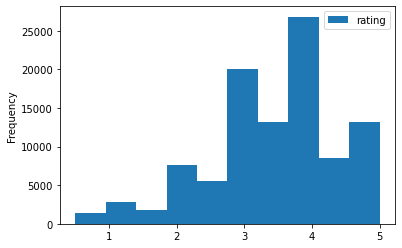

In [31]:
import matplotlib.pyplot as plt

koalas_ratings_df[['rating']].plot(kind='hist')
plt.show()

## Koalas => Pandas

In [34]:
type(koalas_ratings_df.toPandas())

pandas.core.frame.DataFrame